<h2> Notebook overview </h2>

- We have dataframes for red and white wines 
- The data includes the quality rating given to each wine, along with its chemical properties
- We would like to discover a predictive relationship between the chemical properties and quality rating of a wine

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

Import Data

In [76]:
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')
white_wine.Name = 'white wine'
red_wine.Name = 'red wine'

<h3> 1) Prepare data </h3>

In [77]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [78]:
red_wine.shape

(1599, 12)

In [79]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- Check for missing values

In [80]:
red_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- Good. No missing values

- Get some summary stats for red wine

In [81]:
red_wine.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


- Create "quality_label" column

In [82]:
red_wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [83]:
# Create "quality_label" column with following ranges
# 0 =< quality  <= 5: 'low'
# 6 =< quality <=7: 'medium'
# 8 =< quality <= 10: 'high'

red_wine['quality_label']= red_wine['quality'].apply(lambda val: 'low' if val <=5 else 'medium' if val <= 7 else 'high')

# Convert 'quality_label' into 'categorical' data type. 
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories = ['low', 'medium', 'high'])

- Repeat for white wines

In [84]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [85]:
white_wine.shape

(4898, 12)

Note that there are over three times as many rows for the white wine. <br>
We will likely have to normalise for some plots later

In [86]:
white_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- Good. No missing values

In [87]:
white_wine.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000
mean,6.855,0.278,0.334,6.391,0.046,35.308,138.361,0.994,3.188,0.490,10.514,5.878
std,0.844,0.101,0.121,5.072,0.022,17.007,42.498,0.003,0.151,0.114,1.231,0.886
min,3.800,0.080,0.000,0.600,0.009,2.000,9.000,0.987,2.720,0.220,8.000,3.000
25%,6.300,0.210,0.270,1.700,0.036,23.000,108.000,0.992,3.090,0.410,9.500,5.000
50%,6.800,0.260,0.320,5.200,0.043,34.000,134.000,0.994,3.180,0.470,10.400,6.000
75%,7.300,0.320,0.390,9.900,0.050,46.000,167.000,0.996,3.280,0.550,11.400,6.000
max,14.200,1.100,1.660,65.800,0.346,289.000,440.000,1.039,3.820,1.080,14.200,9.000


In [88]:
white_wine['quality_label'] = white_wine['quality'].apply(lambda x: 'low' if x <= 5 else 'medium' if x <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories = ['low', 'medium', 'high'])

In [89]:
# Add wine_type column for red and white
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

- Combine red and white wine data into single dataframe

In [90]:
# Concatenate red and white wines into single dataframe
wines = pd.concat([red_wine, white_wine])

- Shuffle dataset to make red and white wine rows randomly distributed

In [91]:
# Shuffle the dataset so the whites and reds are randomly distributed. 

# reset_index –> Assign new numbers (from 0 to n) for indices; drop = True –> remove old indices
# DataFrame.sample(frac = float) –> Return randomised sample (size determined by 'frac' param)
# random_state = seed for pseudo random number generator

wines = wines.sample(frac=1, random_state = 42).reset_index(drop = True)

In [92]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,high,white
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,low,red
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,medium,white
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,medium,white
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,medium,white


- Create new dataframes with summary stats for selected columns

In [93]:
# Create new dataframes with summary stats for selected columns:
red_wine_stats = red_wine.describe()[['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']].round(2)
white_wine_stats = white_wine.describe()[['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']].round(2)

In [94]:
red_wine_stats.head()

,residual sugar,total sulfur dioxide,sulphates,alcohol,volatile acidity,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,2.54,46.47,0.66,10.42,0.53,5.64
std,1.41,32.90,0.17,1.07,0.18,0.81
min,0.90,6.00,0.33,8.40,0.12,3.00
25%,1.90,22.00,0.55,9.50,0.39,5.00


In [95]:
white_wine_stats.head()

,residual sugar,total sulfur dioxide,sulphates,alcohol,volatile acidity,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.39,138.36,0.49,10.51,0.28,5.88
std,5.07,42.50,0.11,1.23,0.10,0.89
min,0.60,9.00,0.22,8.00,0.08,3.00
25%,1.70,108.00,0.41,9.50,0.21,5.00


- Concatenate the two statistics tables 

In [96]:
# Concatenate the two stats tables to get a better overview
wines_stats = pd.concat([red_wine_stats, white_wine_stats], axis = 1, keys = ['Red Wine Statistics', 'White Wine Statistics'])
wines_stats

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

<h4> Quick observations based on statistics </h4>

- Mean residual sugar and total sulfur dioxide = higher in white wine.
- Mean sulphates, volatile acidity = higher in red wine.
- std for residual sugar much higher in white wine.
- std for total sulfur dioxide much higher in white wine.
- std for sulphates slightly higher in red wine.

<h3> 2) Number of white vs red wines in data </h3>

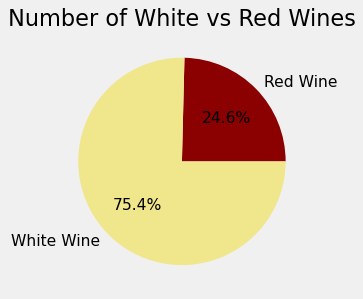

In [97]:
# Create pie chart to compare total number of white vs red wines
labels = ['Red Wine', 'White Wine']
values = [len(red_wine), len(white_wine)]
colors = ['DarkRed', 'Khaki']

plt.style.use('fivethirtyeight')
plt.figure(figsize = (4,4), dpi = 80)
plt.pie(values, labels = labels, autopct = "%1.1f%%", colors = colors)
plt.title('Number of White vs Red Wines')
#plt.savefig('pieplot_white_vs_red.png')
plt.show()

<h3> 3) Distribution of quality labels for red and white wines </h3>

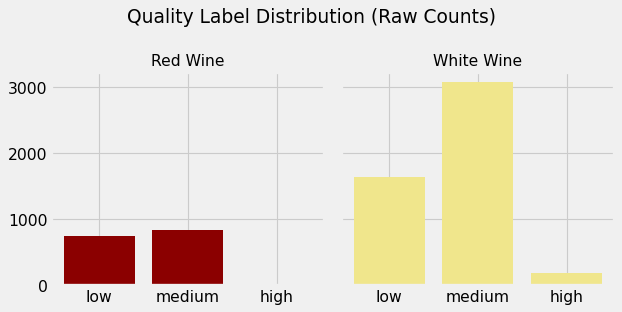

In [98]:
red_wine_by_quality = red_wine.groupby('quality_label').count().iloc[:,0]
white_wine_by_quality = white_wine.groupby('quality_label').count().iloc[:,0]

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(1,2, figsize = (8,4), sharey = True, dpi = 80)
plt.suptitle('Quality Label Distribution (Raw Counts)')

ax[0].bar(x = red_wine_by_quality.index, height = red_wine_by_quality.values, color = 'DarkRed')
ax[0].set_title('Red Wine', fontsize = 14)

ax[1].bar(x = white_wine_by_quality.index, height = white_wine_by_quality.values, color = 'Khaki')
ax[1].set_title('White Wine', fontsize = 14)

plt.tight_layout()
#plt.savefig('quality_label_distribution_raw.png')
plt.show()

- It's difficult to compare the distributions because there are more whites than reds. 
- So we'll normalise.

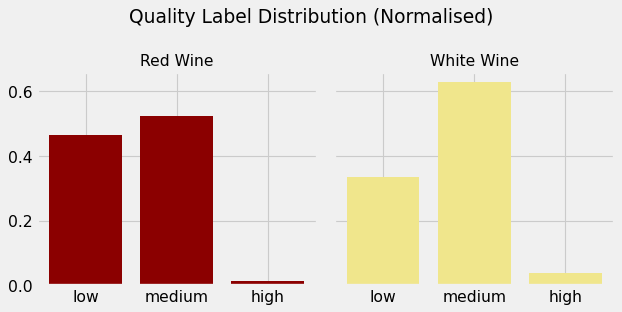

In [99]:
red_wine_by_quality = red_wine.groupby('quality_label').count().iloc[:,0]
white_wine_by_quality = white_wine.groupby('quality_label').count().iloc[:,0]

# Normalise red wine values
red_x = red_wine_by_quality.index
red_y = list(red_wine_by_quality.values)
red_y_sum = sum(red_y)
red_y_norm = [val / red_y_sum for val in red_y]

# Normalise white wine values
white_x = white_wine_by_quality.index
white_y = list(white_wine_by_quality.values)
white_y_sum = sum(white_y)
white_y_norm = [val / white_y_sum for val in white_y]


plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(1,2, figsize = (8,4), sharey = True, dpi = 80)
plt.suptitle('Quality Label Distribution (Normalised)')

ax[0].bar(x = red_x, height = red_y_norm, color = 'DarkRed')
ax[0].set_title('Red Wine', fontsize = 14)

ax[1].bar(x = white_x, height = white_y_norm, color = 'Khaki')
ax[1].set_title('White Wine', fontsize = 14)

plt.tight_layout()
#plt.savefig('quality_label_distribution_normalised.png')
plt.show()

- Plot the same information on single histogram

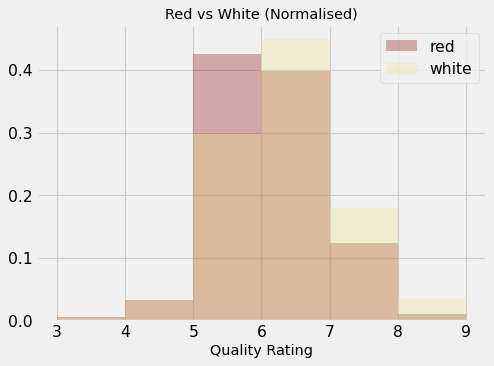

In [100]:
# We can see the same information in a normalised histogram

fig, ax = plt.subplots(dpi = 80)

ax.hist(red_wine['quality'], color = 'DarkRed', 
        density = True,
        label = 'red',
        bins = np.arange(3,10, 1), alpha = 0.3)
ax.hist(white_wine['quality'], color = 'Khaki', 
        density = True, 
        label = 'white',
        bins = np.arange(3,10,1), alpha = 0.3)

ax.set_xlabel ('Quality Rating', fontsize = 13)
ax.set_title('Red vs White (Normalised)', fontsize = 13)
ax.legend()

plt.tight_layout()
plt.show()

- We see that the white wines tend to have higher quality rating

<h3> 4) Quality as a function of individual features </h3>

- Create helper functions to deal with outliers

In [101]:
"""
Function for detecting outliers. 

Two input parameters: dataframe, column label

Output: one tuple 
(int1, int2, list1, list2)

int1 = number of upper outliers
int2 = number of lower outliers
list1 = row numbers of upper outliers
list2 = row numbers of lower outliers
"""

def detect_outliers(df, column):
    Q1 = np.percentile (df[column], 25)
    Q3 = np.percentile (df[column], 75)
    IQR = Q3 - Q1
    upper = Q3 + 1*IQR        # upper value threshold
    lower = Q1 - 1*IQR        # lower value threshold

    upper_mask = df[column] >= upper
    lower_mask = df[column] <= lower

    num_upper_outliers = len (df[upper_mask][column].values)
    num_lower_outliers = len (df[lower_mask][column].values)

    rows_upper_outliers = list (np.where(upper_mask)[0])      # indices for upper outliers as a list 
    rows_lower_outliers = list(np.where(lower_mask)[0])      # indices for lower outliers as a list

    return (num_upper_outliers, num_lower_outliers, rows_upper_outliers, rows_lower_outliers)

In [102]:
"""
Function for removing outliers from a df column

input params: df, column 
output: df with outlier rows dropped
"""

def drop_outliers (df, column):
    int1, int2, list1, list2 = detect_outliers(df, column)
    temp = df.copy()                            # important to call .copy() method, otherwise the original df also gets modified
    temp.drop(list1, inplace = True)
    temp.drop(list2, inplace = True)
    temp.Name = df.Name                         # Make sure to give the temp dataframe the same name; will need this later when plotting.
    return temp

- Distribution of individual feature based on quality label

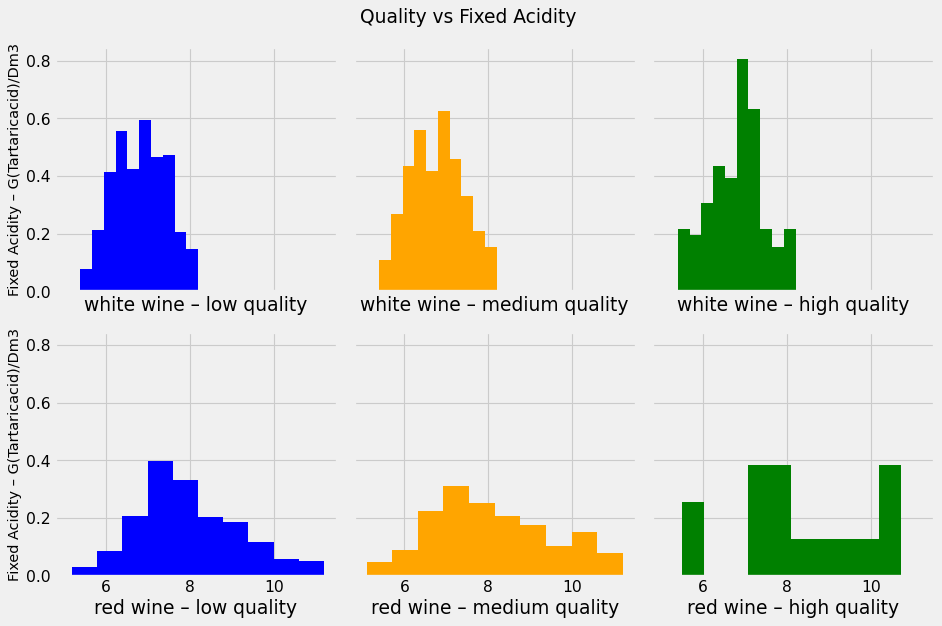

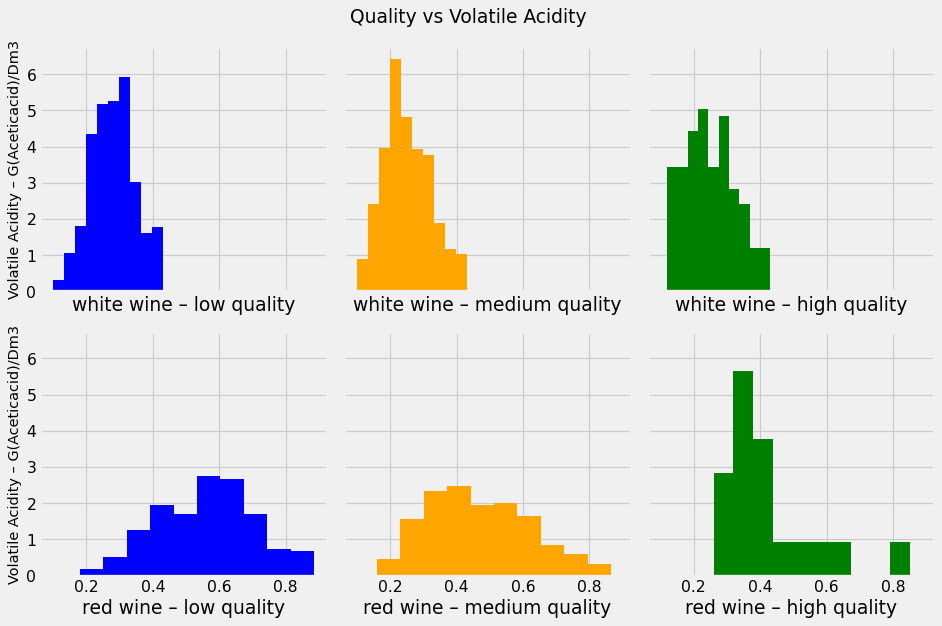

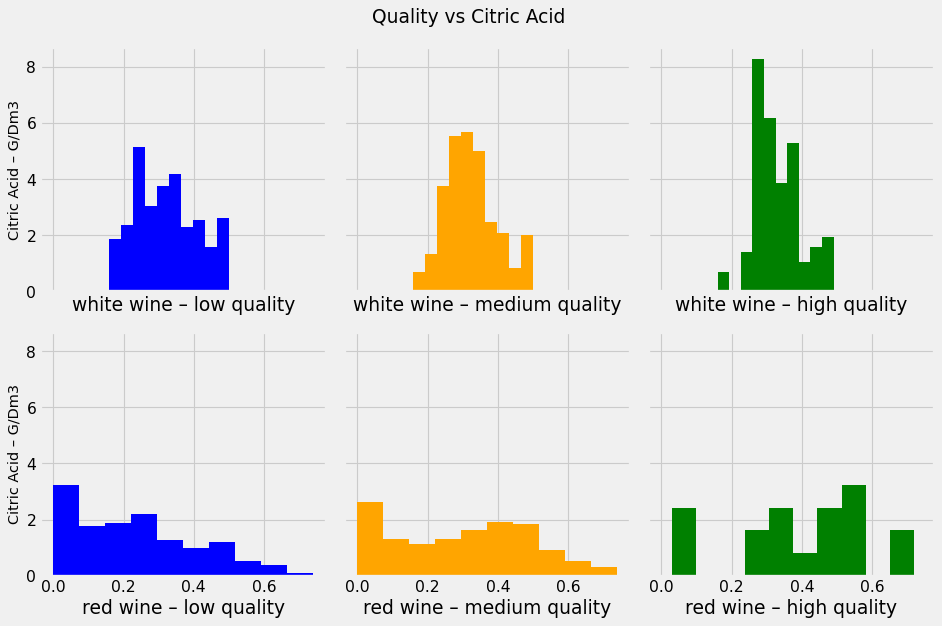

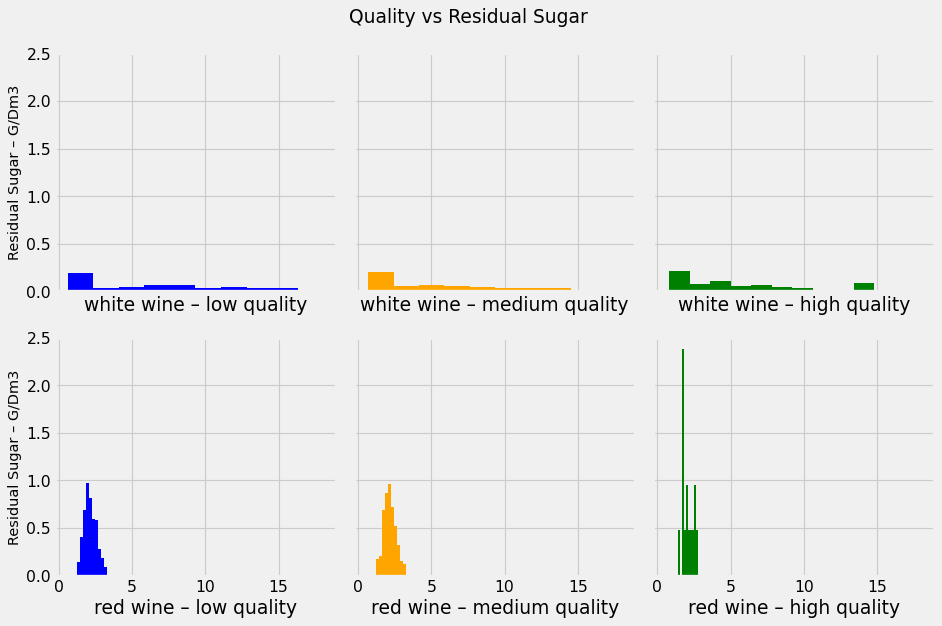

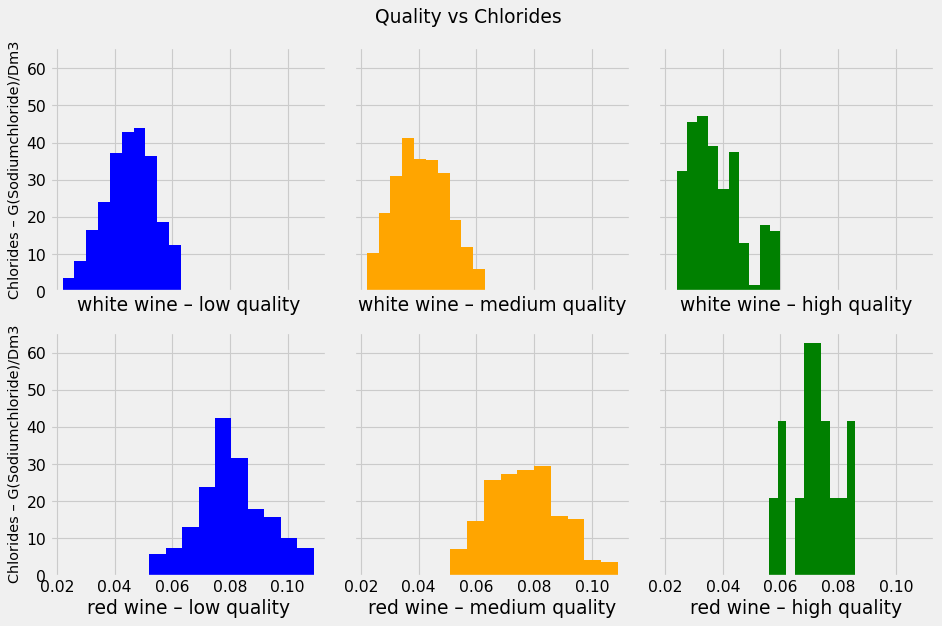

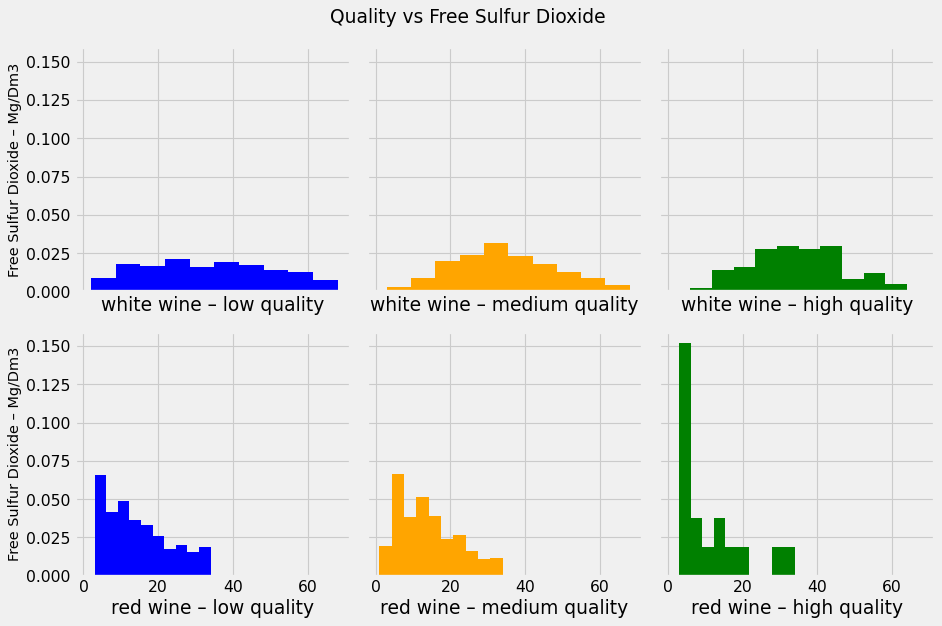

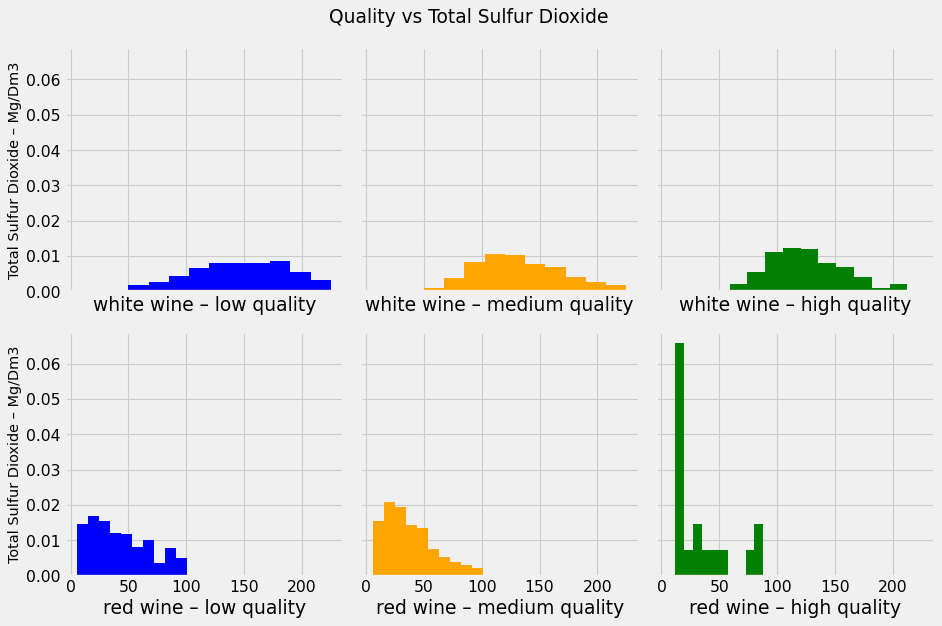

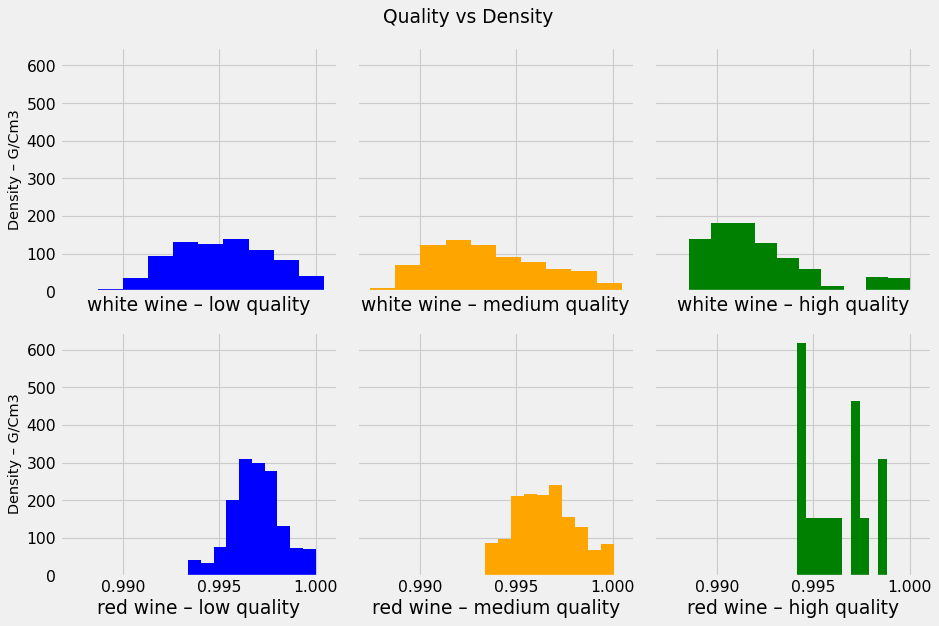

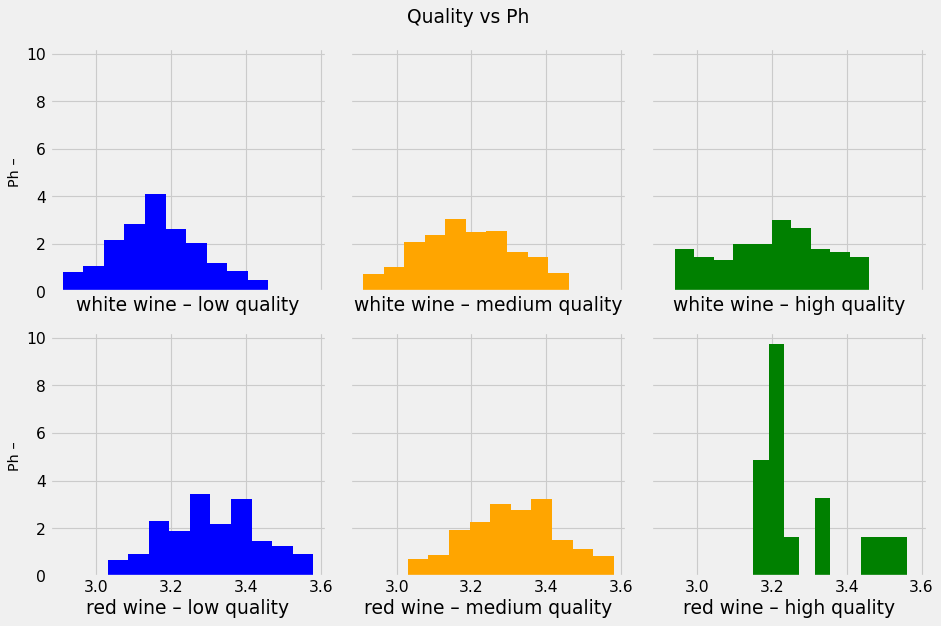

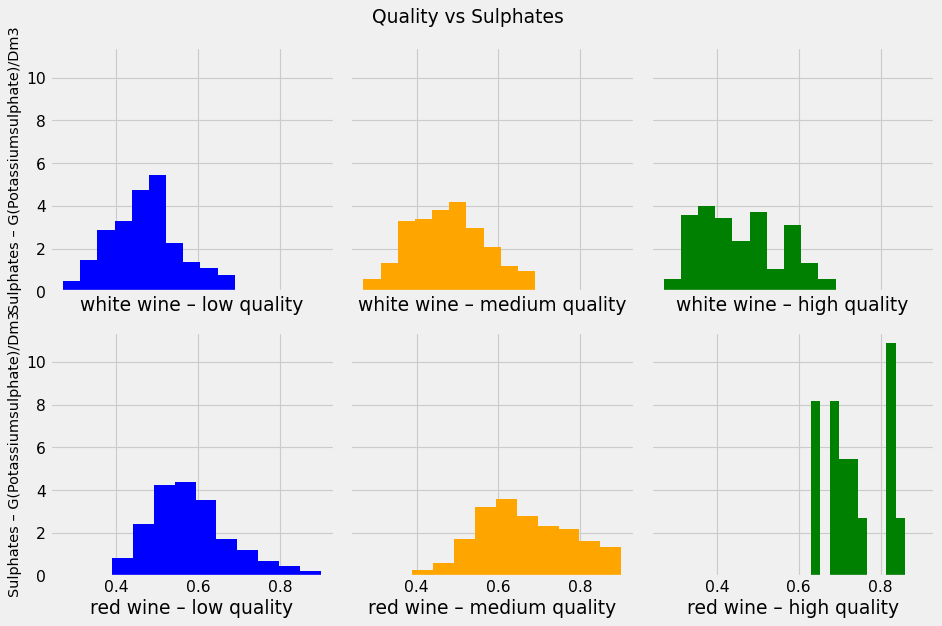

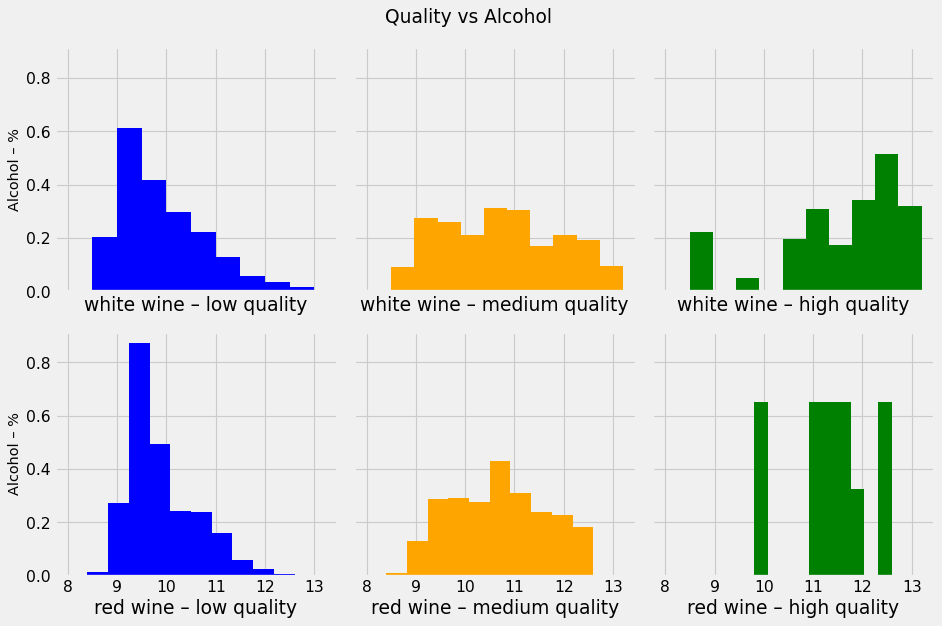

In [103]:
# For each quality label, plot histogram for each feature invidually.

def plot_histograms(white_wine, red_wine, feature):
 
    white_wine = drop_outliers(white_wine, feature)
    red_wine = drop_outliers(red_wine, feature)
    

    white_wine_low = white_wine [white_wine['quality_label'] == 'low']
    white_wine_medium = white_wine [white_wine['quality_label'] == 'medium']
    white_wine_high = white_wine [white_wine['quality_label'] == 'high']

    red_wine_low = red_wine [red_wine['quality_label'] == 'low']
    red_wine_medium = red_wine [red_wine['quality_label'] == 'medium']
    red_wine_high = red_wine [red_wine['quality_label'] == 'high']

    feature_units = {'fixed acidity': 'g(tartaricacid)/dm3',
                        'volatile acidity': 'g(aceticacid)/dm3',
                        'citric acid': 'g/dm3',
                        'residual sugar': 'g/dm3',
                        'chlorides': 'g(sodiumchloride)/dm3',
                        'free sulfur dioxide':'mg/dm3',
                        'total sulfur dioxide':'mg/dm3',
                        'density': 'g/cm3',
                        'pH': '',
                        'sulphates': 'g(potassiumsulphate)/dm3',
                        'alcohol': '%'
                        }

    fig, ax = plt.subplots(2, 3, sharex = True, sharey = True, figsize = (12,8), dpi = 80)
    
    fig.suptitle(f'Quality vs {feature.title()} ')

    ax[0][0].hist(white_wine_low[feature], density = True, color = 'blue')
    ax[0][0].set_xlabel('white wine – low quality')
    ax[0][0].set_ylabel(f'{feature.title()} – {feature_units[feature].title()}', fontsize = 13)

    ax[0][1].hist(white_wine_medium[feature], density = True, color = 'orange')
    ax[0][1].set_xlabel('white wine – medium quality')

    ax[0][2].hist(white_wine_high[feature], density = True, color = 'green')
    ax[0][2].set_xlabel('white wine – high quality')


    ax[1][0].hist(red_wine_low[feature], density = True, color = 'blue')
    ax[1][0].set_xlabel('red wine – low quality')
    ax[1][0].set_ylabel(f'{feature.title()} – {feature_units[feature].title()}', fontsize = 13)

    ax[1][1].hist(red_wine_medium[feature], density = True, color = 'orange')
    ax[1][1].set_xlabel('red wine – medium quality')

    ax[1][2].hist(red_wine_high[feature], density = True, color = 'green')
    ax[1][2].set_xlabel('red wine – high quality')

    plt.tight_layout()
    plt.show()


feature_units = {'fixed acidity': 'g/dm3',
                        'volatile acidity': 'g/dm3',
                        'citric acid': 'g/dm3',
                        'residual sugar': 'g/dm3',
                        'chlorides': 'g/dm3',
                        'free sulfur dioxide':'mg/dm3',
                        'total sulfur dioxide':'mg/dm3',
                        'density': 'g/cm3',
                        'pH': '',
                        'sulphates': 'g/dm3',
                        'alcohol': '%'
                        }

for feature in feature_units:
    plot_histograms(white_wine, red_wine, feature)

<h3> 5) Box plots </h3>

- We want to explore the relationship between each feature (e.g. pH, density, etc.) and the quality label for each wine type

In [104]:
# Dataframe with all wines, divided into 'low', 'medium' and 'high'
wines_low = wines[wines['quality_label'] == 'low']
wines_medium = wines[wines['quality_label'] == 'medium']
wines_high = wines[wines['quality_label'] == 'high']

# Dataframe with white wines, divided into 'low', 'medium' and 'high'
white_wine_low = white_wine[white_wine['quality_label'] == 'low']
white_wine_medium = white_wine[white_wine['quality_label'] == 'medium']
white_wine_high = white_wine[white_wine['quality_label'] == 'high']

# Dataframe with red wines, divided into 'low', 'medium' and 'high'
red_wine_low = red_wine[red_wine['quality_label'] == 'low']
red_wine_medium = red_wine[red_wine['quality_label'] == 'medium']
red_wine_high = red_wine[red_wine['quality_label'] == 'high']

feature_units = {'fixed acidity': 'g/dm3',
                        'volatile acidity': 'g/dm3',
                        'citric acid': 'g/dm3',
                        'residual sugar': 'g/dm3',
                        'chlorides': 'g/dm3',
                        'free sulfur dioxide':'mg/dm3',
                        'total sulfur dioxide':'mg/dm3',
                        'density': 'g/cm3',
                        'pH': '',
                        'sulphates': 'g/dm3',
                        'alcohol': '%'
                        }

- Function for creating three boxplots (low, medium, high quality) side by side 

In [105]:
"""
Function with one input parameter, the feature name.

Function that plots three subplots in one (1x3) figure. 
Each subplot has three boxplots, with each boxplot 
representing 'low', 'medium' or 'high' quality.
"""

def boxplot_all_white_red (feature):

    fig, ax = plt.subplots(1,3, figsize = (12,4), sharex = True, sharey = True, dpi = 80)
    fig.suptitle(feature, fontsize = 16)

    bps = [0, 0, 0]                             # bps will hold three boxplot objects.
    colors = ['blue', 'orange', 'green']        # colours for low, medium, and high qualities.

    bps[0] = ax[0].boxplot(
                                [wines_low[feature], 
                                    wines_medium[feature], 
                                    wines_high[feature]], 
                                    patch_artist = True, 
                                    labels = ['Low', 'Medium', 'High'],
                                    widths = 0.7
                                )
    ax[0].set_title('All', fontsize = 13)
    ax[0].set_xlabel('Quality Label',fontsize = 13)
    ax[0].set_ylabel(f"{feature} – {feature_units[feature]}", fontsize = 13)

    bps[1] = ax[1].boxplot(
                            [white_wine_low[feature], 
                                white_wine_medium[feature], 
                                white_wine_high[feature]], 
                                patch_artist = True, 
                                labels = ['Low', 'Medium', 'High'],
                                widths = 0.7
                            )
    ax[1].set_title('White',fontsize = 13)
    ax[1].set_xlabel('Quality Label',fontsize = 13)

    bps[2] = ax[2].boxplot(
                                [red_wine_low[feature], 
                                red_wine_medium[feature], 
                                red_wine_high[feature]], 
                                patch_artist = True, 
                                labels = ['Low', 'Medium', 'High'],
                                widths = 0.7
                                            )
    ax[2].set_title('Red',fontsize = 13)
    ax[2].set_xlabel('Quality Label',fontsize = 13)

    for bp in bps:
        for patch, color in zip (bp['boxes'], colors):
                patch.set_facecolor(color)
        for flier in bp['fliers']:
            flier.set(marker = 'D')
    
    return fig, ax
    


- Call the function above (boxplot_all_white_red()) to automate creation of box plots

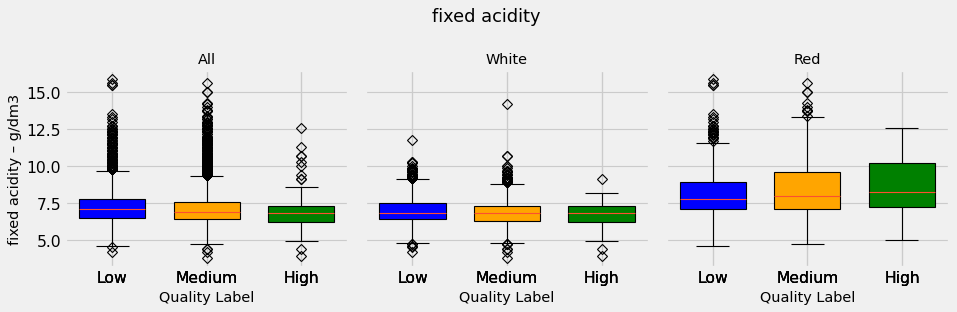

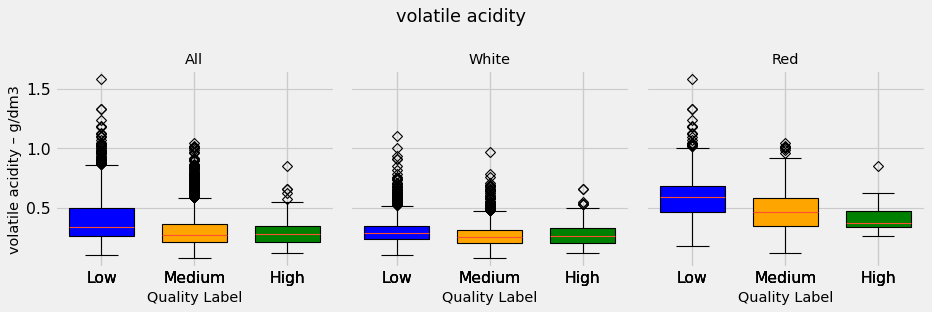

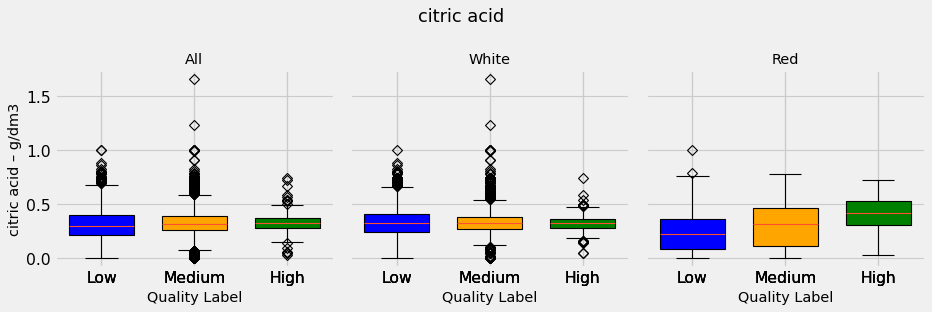

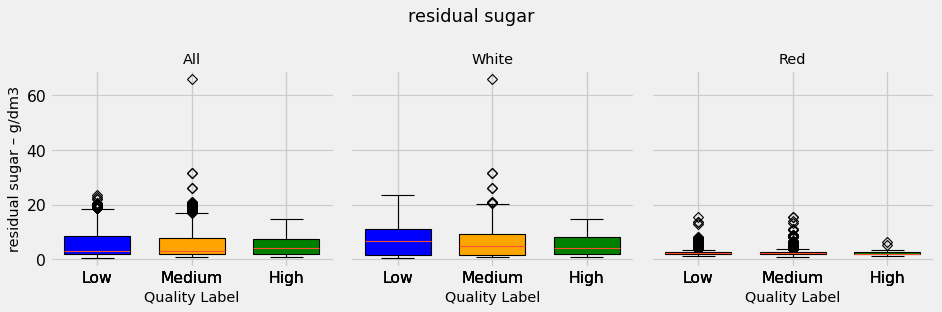

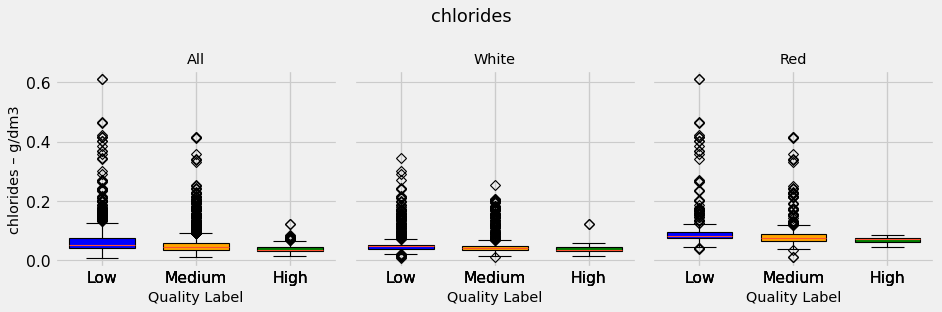

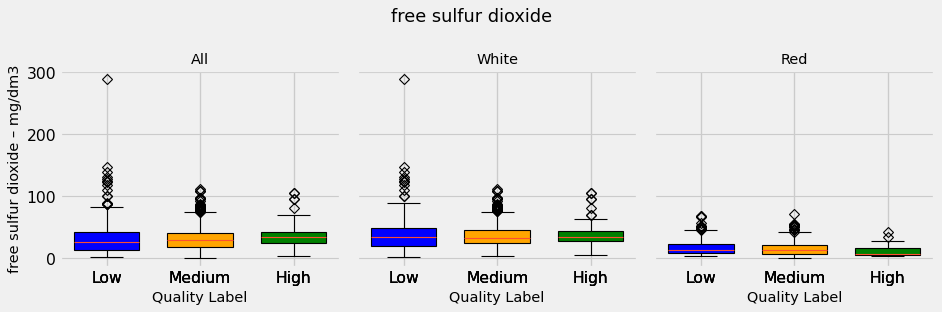

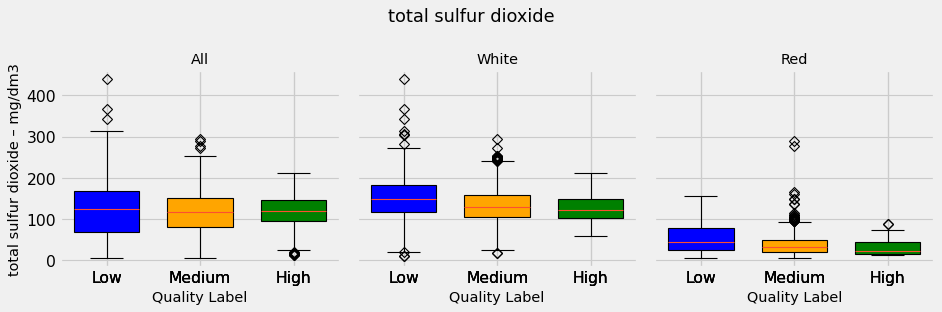

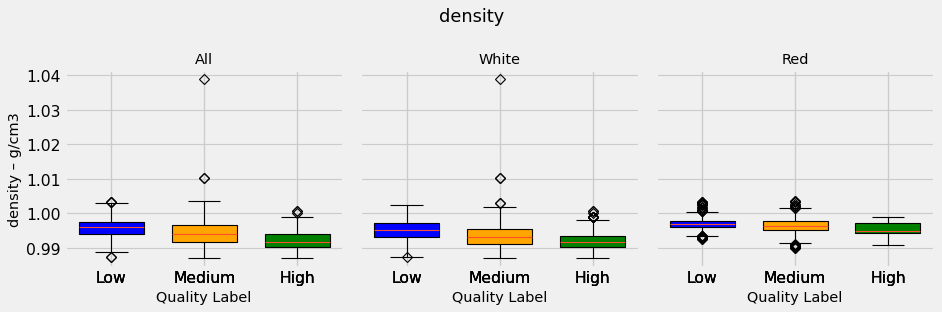

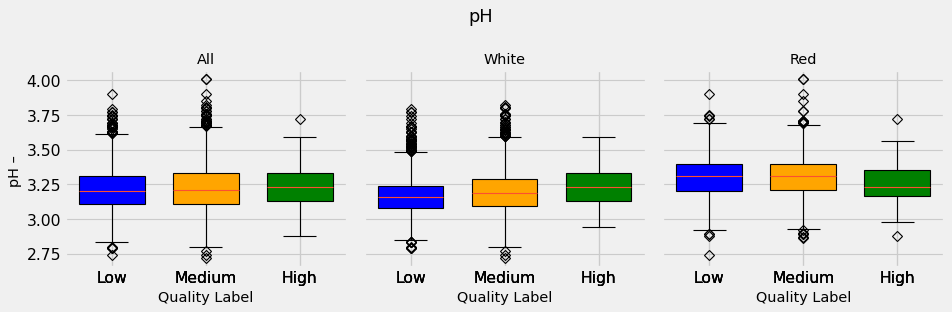

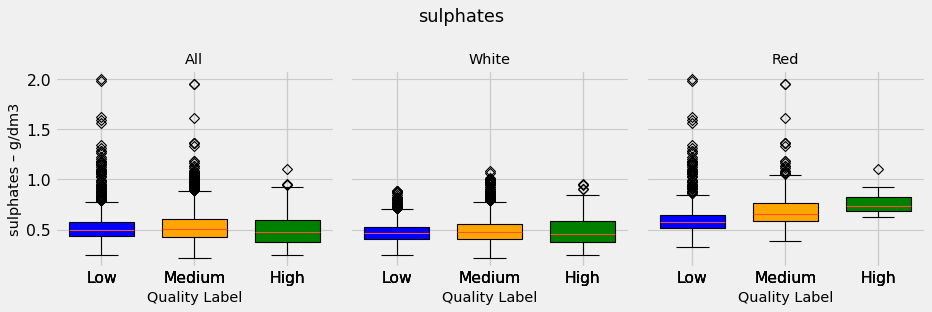

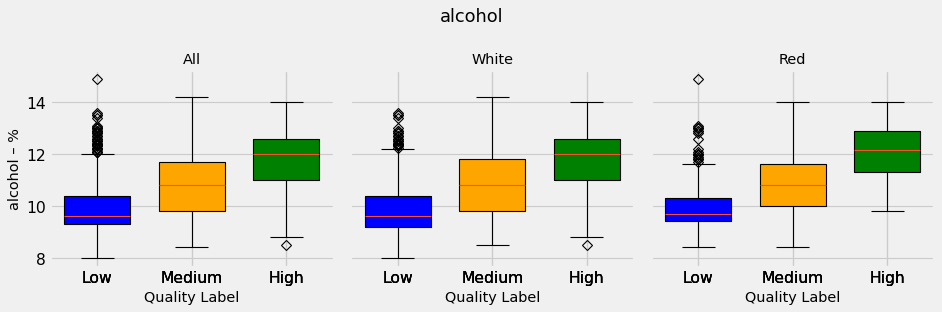

In [106]:
"""
 Now call the boxplot_all_white_red() function for 
all desired features using a for loop
"""

for feature in feature_units:
    boxplot_all_white_red(feature)
    plt.tight_layout()
    #plt.savefig(f'boxplot_with_outlier_{feature}.png')
    plt.show()

<h4> Observations </h4>

- We see that for some of the features (such as 'residual sugar' and 'chlorides'), the outliers are obscuring the trends. 
- So we'll create the same box plots but with the outliers removed.

- function for creating box plots but without the outliers

In [107]:
"""
Same function as boxplot_all_white_red,
but modified to ignore outliers. 

(showfliers = False)
"""

def boxplot_all_white_red_ignore_fliers (feature):

    fig, ax = plt.subplots(1,3, figsize = (12,4), sharex = True, sharey = True, dpi = 80)
    fig.suptitle(feature, fontsize = 16)

    bps = [0, 0, 0]                             # bps will hold three boxplot objects.
    colors = ['blue', 'orange', 'green']        # colours for low, medium, and high qualities.

    bps[0] = ax[0].boxplot(
                                [wines_low[feature], 
                                    wines_medium[feature], 
                                    wines_high[feature]], 
                                    patch_artist = True, 
                                    labels = ['Low', 'Medium', 'High'],
                                    widths = 0.7,
                                    showfliers = False
                                )
    ax[0].set_title('All', fontsize = 13)
    ax[0].set_xlabel('Quality Label',fontsize = 13)
    ax[0].set_ylabel(f"{feature} – {feature_units[feature]}", fontsize = 13)

    bps[1] = ax[1].boxplot(
                            [white_wine_low[feature], 
                                white_wine_medium[feature], 
                                white_wine_high[feature]], 
                                patch_artist = True, 
                                labels = ['Low', 'Medium', 'High'],
                                widths = 0.7,
                                showfliers = False
                            )
    ax[1].set_title('White',fontsize = 13)
    ax[1].set_xlabel('Quality Label',fontsize = 13)

    bps[2] = ax[2].boxplot(
                                [red_wine_low[feature], 
                                red_wine_medium[feature], 
                                red_wine_high[feature]], 
                                patch_artist = True, 
                                labels = ['Low', 'Medium', 'High'],
                                widths = 0.7,
                                showfliers = False
                                            )
    ax[2].set_title('Red',fontsize = 13)
    ax[2].set_xlabel('Quality Label',fontsize = 13)

    for bp in bps:
        for patch, color in zip (bp['boxes'], colors):
                patch.set_facecolor(color)
        for flier in bp['fliers']:
            flier.set(marker = 'D')
    
    return fig, ax

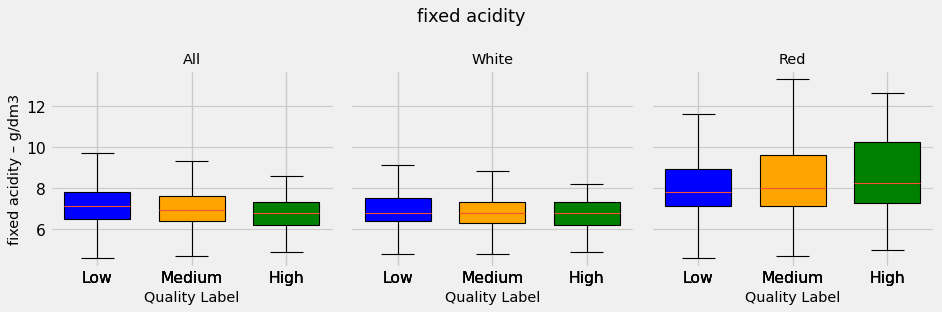

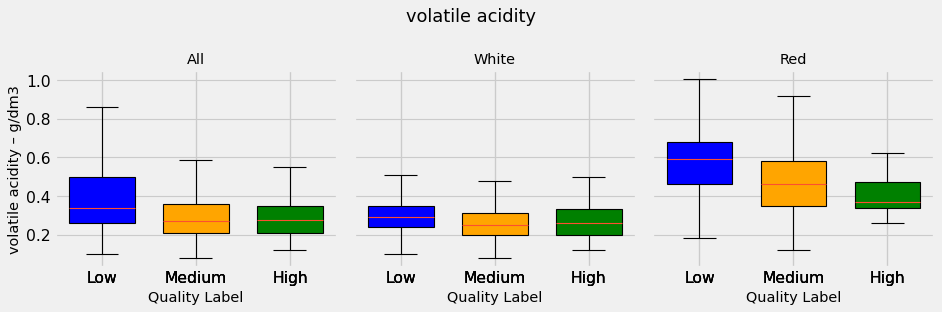

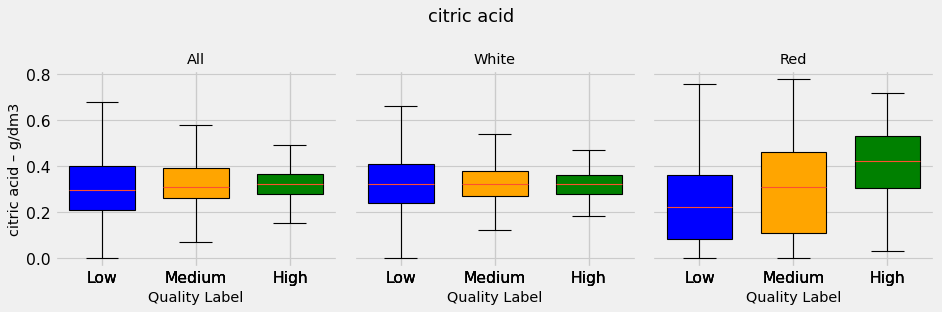

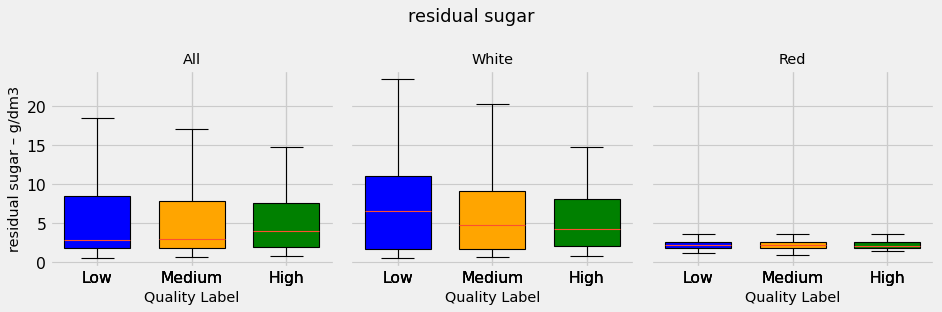

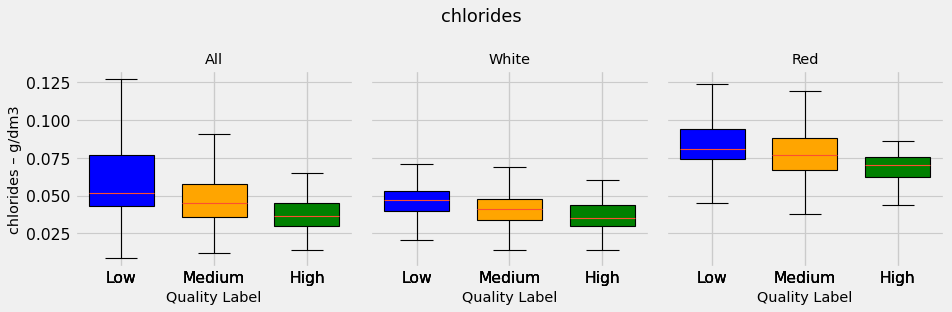

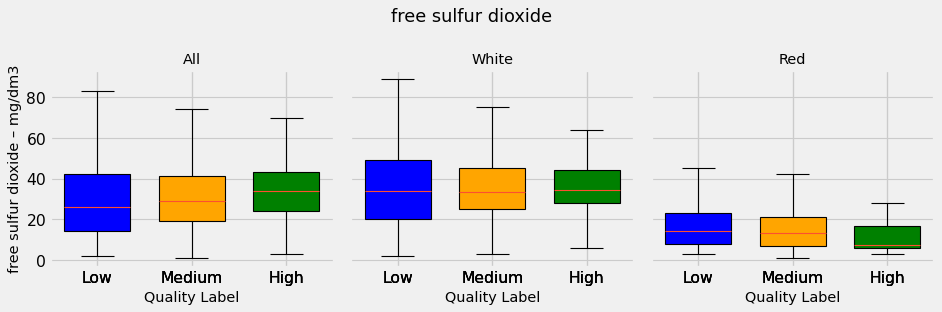

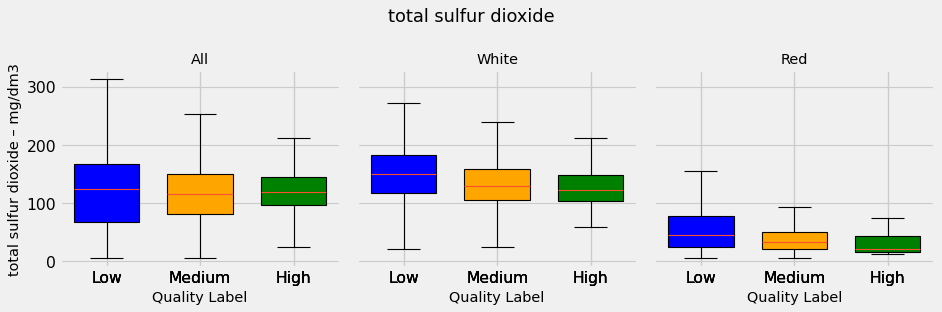

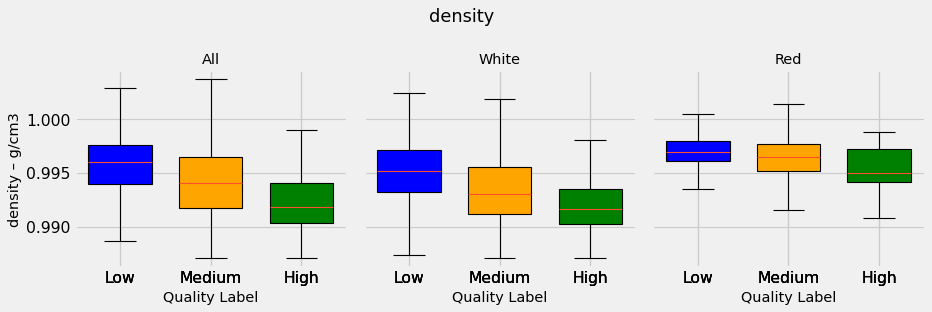

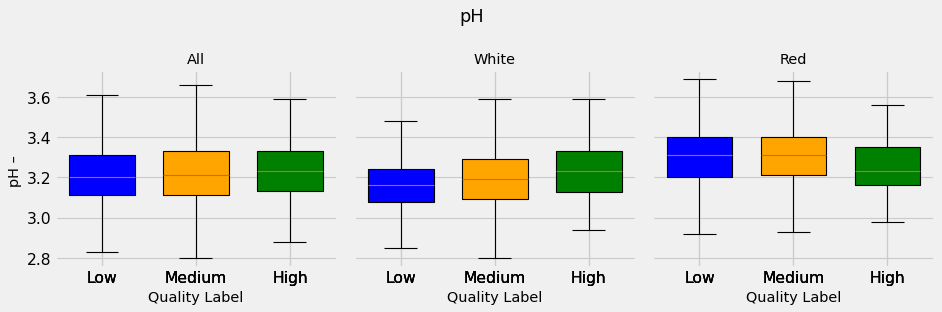

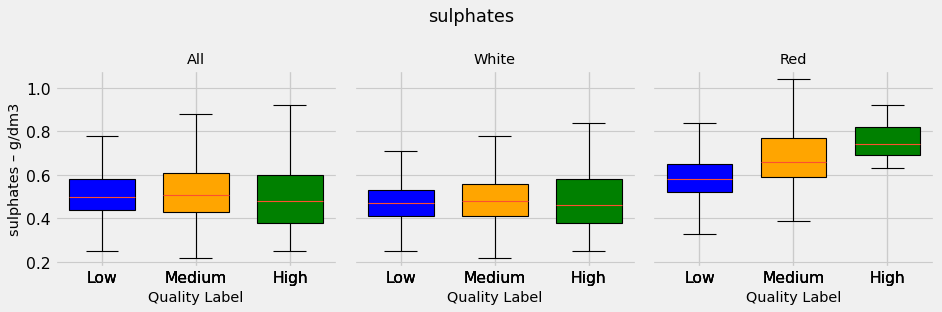

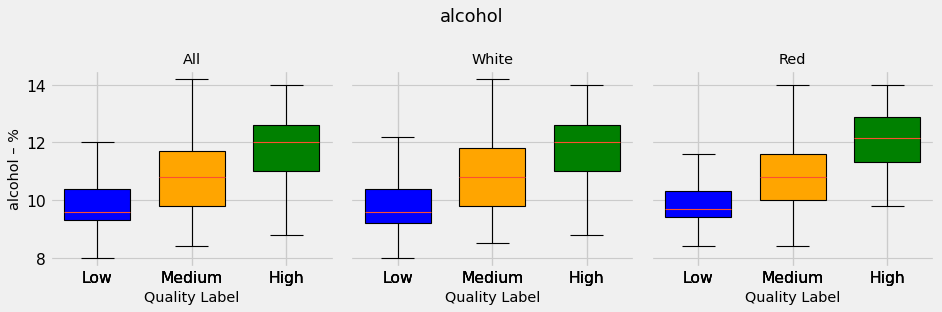

In [108]:
"""
 Now call the boxplot_all_white_red_ignore_fliers() function for 
all desired features using a for loop
"""

for feature in feature_units:
    boxplot_all_white_red_ignore_fliers(feature)
    #plt.savefig(f'boxplot_with_outliers_removed_{feature}.png')
    plt.tight_layout()
    plt.show()

<h4> Observations </h4>

- fixed acidity – red wine has higher level than white wine, but the level doesn't vary significantly as function of quality label. <br>
- volatile acidity – for red wine, decreases as quality goes up. For white wine, stays stable. <br>
- citric acid – for white wine, stays stable, though the variance reduces as quality goes up. For red wine, goes up. <br>
- residual sugar – lower for red wine than for white. But doesn't vary much as function of quality label. <br>
- chlorides – higher in red wines; decreases as quality label goes up. <br>
- free sulfur dioxide – lower in red than white; no significant trend as function of quality label.<br>
- total sulfur dioxide – lower in red than white; goes slightly down as quality label increases. <br>
- density – slightly higher in red than white; decreases as quality goes up. <br>
- pH – whites lower than reds; for whites, goes up as quality increases, for reds, goes down as quality increases. pH meets at similar level for 'high quality' red and white wines. <br>
- sulphates – for white wines, lower and stable; for red wines, higher and increasing. <br>
- alcohol – increases for both white and red. <br>

Important takeaway: we must always consider red and white wines separately. <br>


<h3> 7) Scatter plots </h3>

- "quality" on y axis and "feature" on x axis
- We fit a linear regression line on top of the scatter plot

- function to create 2D scatter plot with OLS regression line

In [109]:
"""
Function to create 2D scatter plot with OLS regression line. 
Four input parameters:
df1, df2, feature1, feature2

Will have two plots side by side: 
white wine on the left, red wine on the right.
"""

def create_2D_scatter_line(df1, df2, feature1, feature2):

    
    x_1 = df1[feature1].tolist()
    y_1 = df1[feature2].tolist()
    x_1 = sm.add_constant(x_1)
    result_1 = sm.OLS(y_1, x_1).fit()

    
    x_2 = df2[feature1].tolist()
    y_2 = df2[feature2].tolist()
    x_2 = sm.add_constant(x_2)
    result_2 = sm.OLS(y_2, x_2).fit()

    # Gradient and constant for white wine and red wine
    grad_1 = result_1.params[1]
    constant_1 = result_1.params[0]

    grad_2 = result_2.params[1]
    constant_2 = result_2.params[0]

    print (f"white wine grad: {round(grad_1,3)}, red wine grad: {round(grad_2,3)}, white wine const: {round(constant_1,3)}, red wine const: {round(constant_2,3)}")

    # Now we plot the scatter plots.

    fig, ax = plt.subplots(1, 2, figsize = (10,5), dpi = 80)

    ax[0].scatter(df1[feature1], df1[feature2])
    ax[0].set_xlabel (feature1)
    ax[0].set_ylabel(feature2)
    ax[0].set_title(df1.Name)

    ax[1].scatter(df2[feature1], df2[feature2])
    ax[1].set_xlabel (feature1)
    ax[1].set_ylabel(feature2)
    ax[1].set_title(df2.Name)

    max_x_1 = df1[feature1].max()
    min_x_1 = df2[feature1].min()

    x_range_1 = np.arange(min_x_1, max_x_1, 0.1)
    y_1 = grad_1 * x_range_1 + constant_1

    max_x_2 = df2[feature1].max()
    min_x_2 = df2[feature1].min()

    x_range_2 = np.arange(min_x_2, max_x_2, 0.1)
    y_2 = grad_2 * x_range_2 + constant_2


    ax[0].plot(x_range_1, y_1, color = 'r')
    ax[1].plot(x_range_2, y_2, color = 'r')

    plt.tight_layout()
    plt.show()

white wine grad: -0.119, red wine grad: 0.058, white wine const: 6.696, red wine const: 5.157


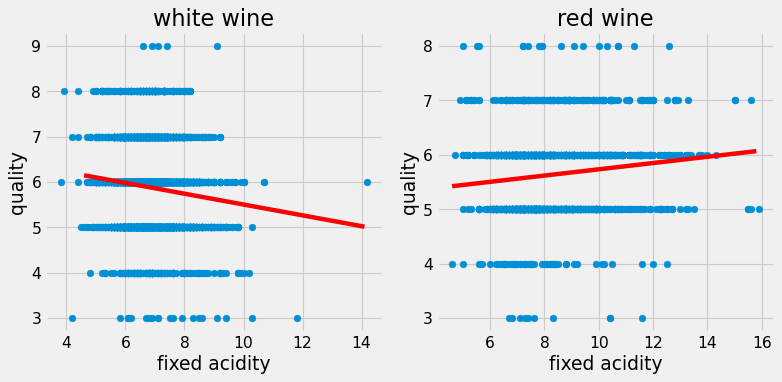

white wine grad: -1.711, red wine grad: -1.761, white wine const: 6.354, red wine const: 6.566


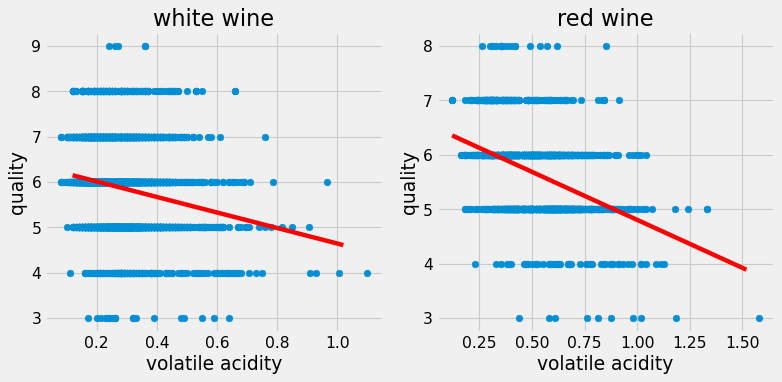

white wine grad: -0.067, red wine grad: 0.938, white wine const: 5.9, red wine const: 5.382


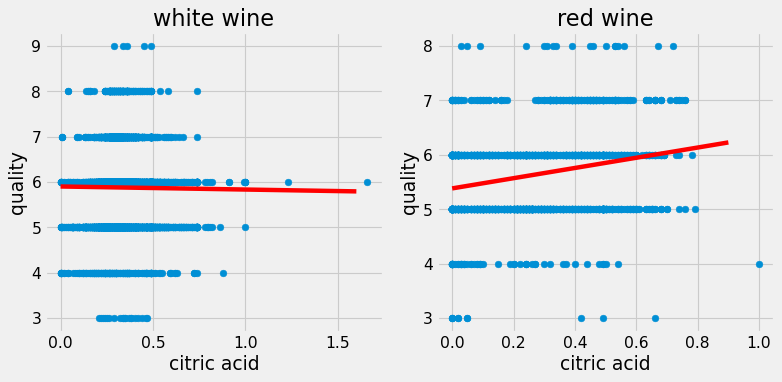

white wine grad: -0.017, red wine grad: 0.008, white wine const: 5.987, red wine const: 5.616


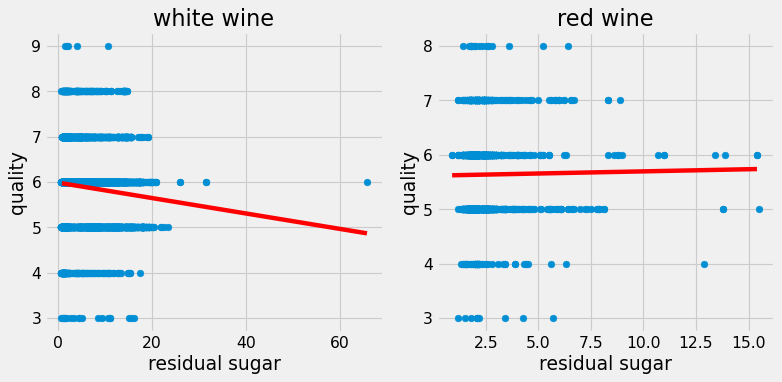

white wine grad: -8.51, red wine grad: -2.212, white wine const: 6.267, red wine const: 5.829


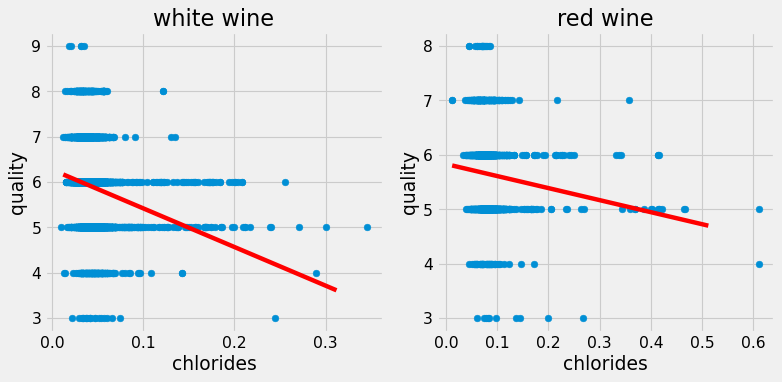

white wine grad: 0.0, red wine grad: -0.004, white wine const: 5.863, red wine const: 5.698


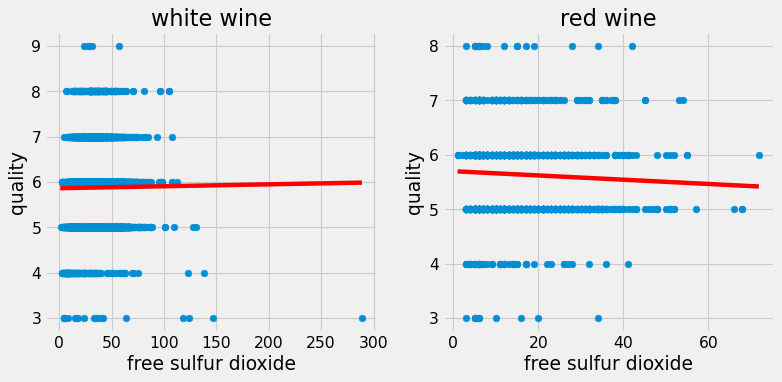

white wine grad: -0.004, red wine grad: -0.005, white wine const: 6.382, red wine const: 5.847


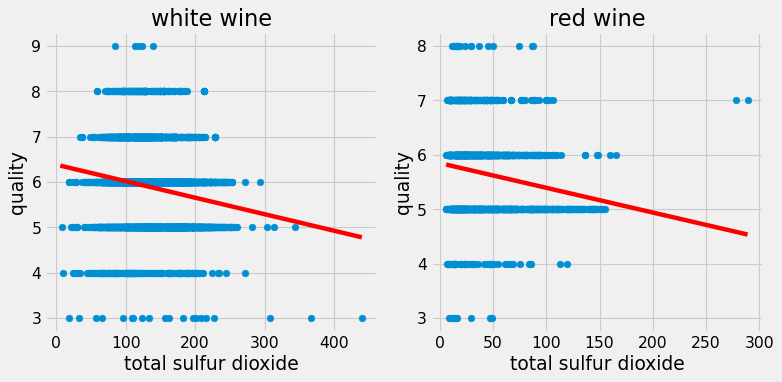

white wine grad: -90.942, red wine grad: -74.846, white wine const: 96.277, red wine const: 80.239


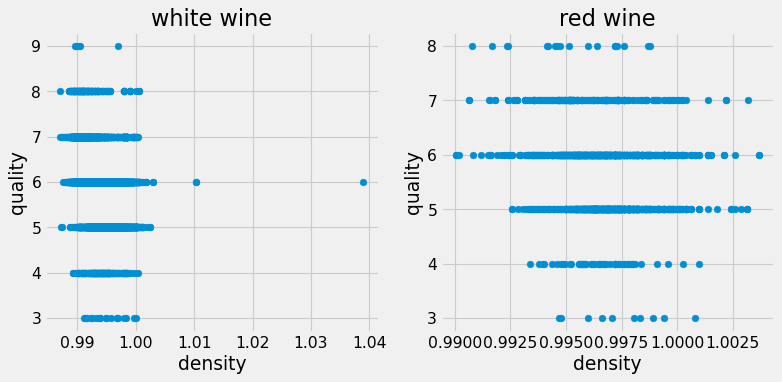

white wine grad: 0.583, red wine grad: -0.302, white wine const: 4.019, red wine const: 6.636


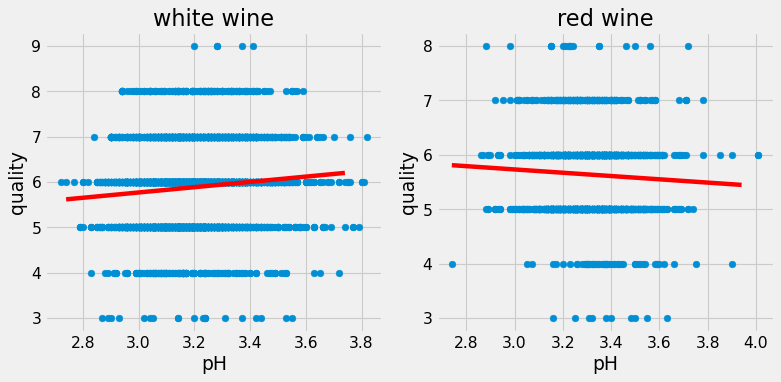

white wine grad: 0.417, red wine grad: 1.198, white wine const: 5.674, red wine const: 4.848


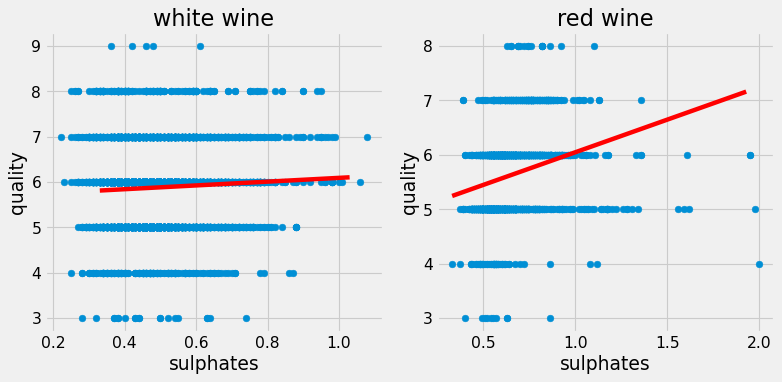

white wine grad: 0.313, red wine grad: 0.361, white wine const: 2.582, red wine const: 1.875


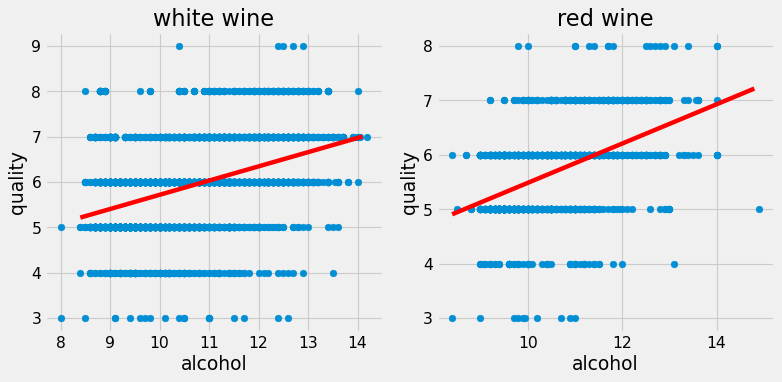

In [110]:
feature_units = {'fixed acidity': 'g/dm3',
                        'volatile acidity': 'g/dm3',
                        'citric acid': 'g/dm3',
                        'residual sugar': 'g/dm3',
                        'chlorides': 'g/dm3',
                        'free sulfur dioxide':'mg/dm3',
                        'total sulfur dioxide':'mg/dm3',
                        'density': 'g/cm3',
                        'pH': '',
                        'sulphates': 'g/dm3',
                        'alcohol': '%'
                        }
for feature in feature_units:
    create_2D_scatter_line(white_wine, red_wine, feature, 'quality')

<h3> 8) Heat map </h3>

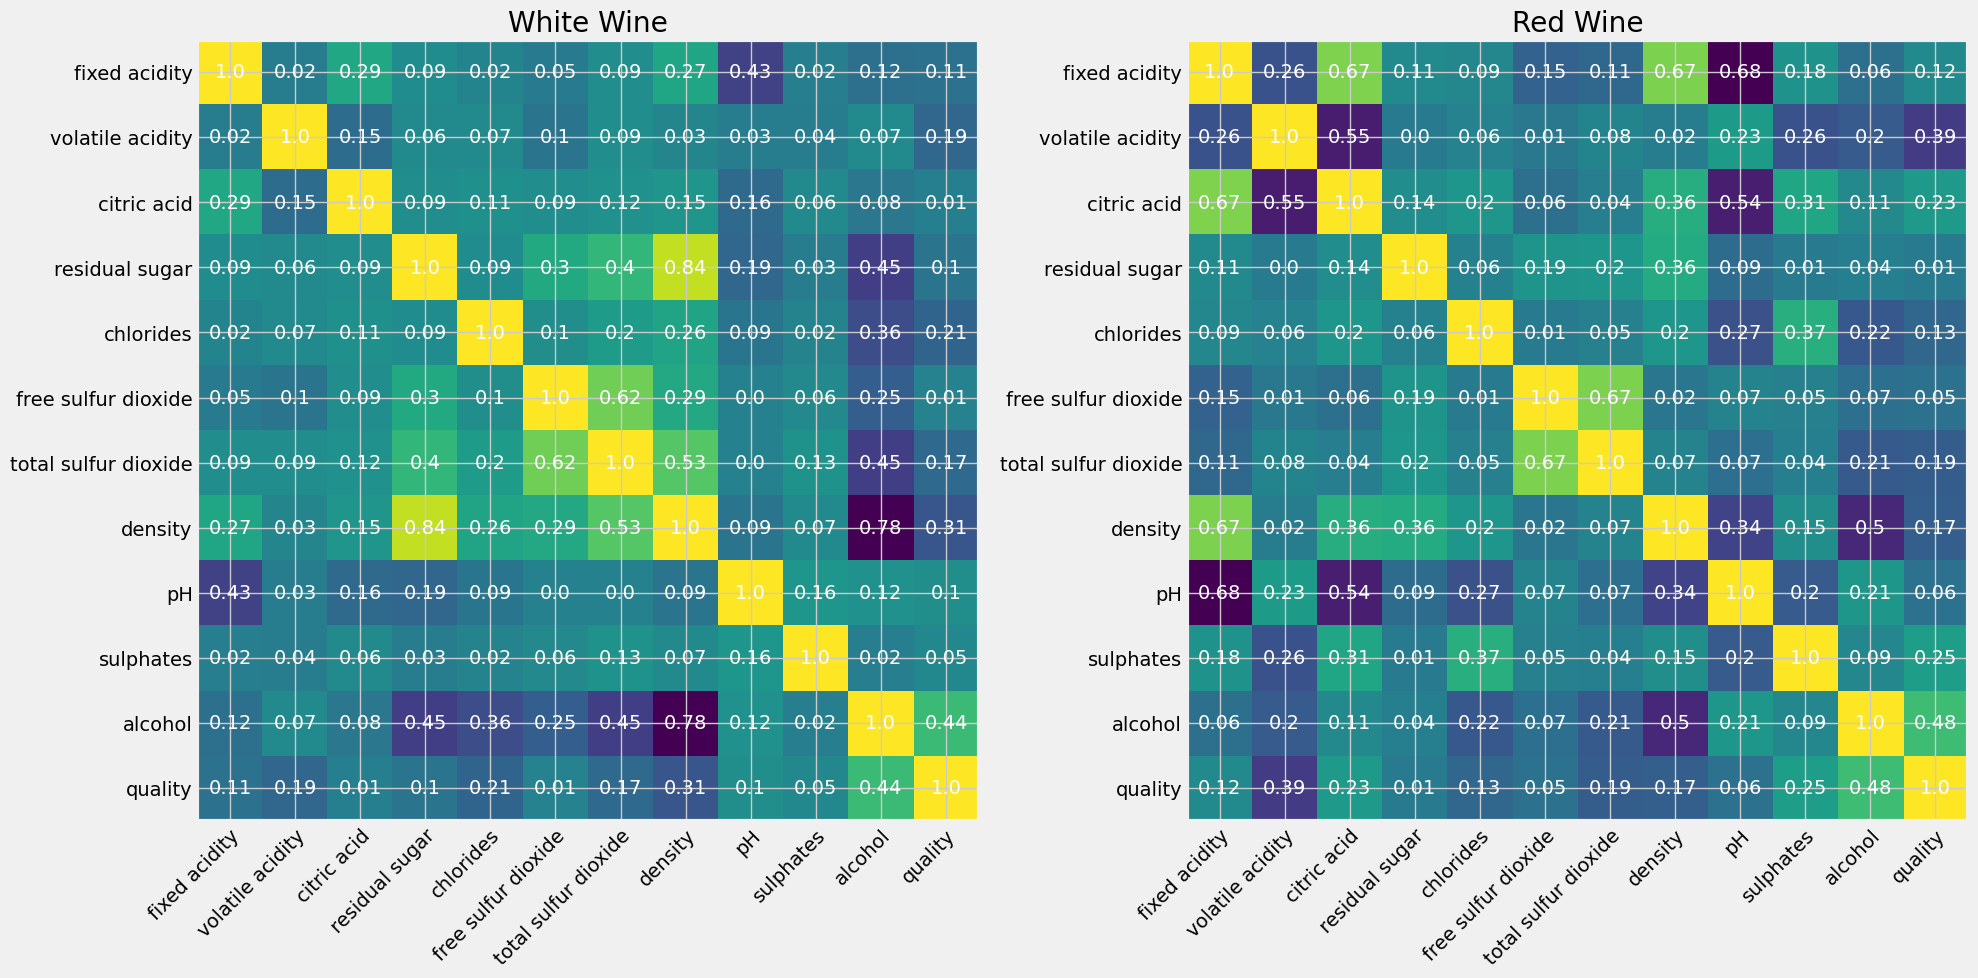

In [111]:
"""
Create heatmap of wine variables
"""

# Select only columns with numeric values
white_wine_nums = white_wine.select_dtypes(include = ['float64', 'int64'])
red_wine_nums = red_wine.select_dtypes(include = ['float64', 'int64'])

# Store column labels
features = white_wine_nums.columns

# Call .corr() method on the two data frames, 
# then convert the correlation matrices into numpy arrays
white_wine_nums = white_wine_nums.corr().to_numpy()
red_wine_nums = red_wine_nums.corr().to_numpy()

# Create fig and axes
fig, ax = plt.subplots(1, 2, figsize = (20,10))

# Display data as image
im_white = ax[0].imshow(white_wine_nums)

# Want to show all xticks and yticks
ax[0].set_xticks(np.arange(len(white_wine_nums)))
ax[0].set_yticks(np.arange(len(white_wine_nums)))

# Add labels to xticks and yticks
ax[0].set_xticklabels(features)
ax[0].set_yticklabels(features)

# Rotate the tick labels and set their alignment.
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# Round correlation coefficient to two decimal figures
# and use absolute value for greater clarity.

for i in range(len(features)):
    for j in range(len(features)):
        text = ax[0].text(j, i, abs(round(white_wine_nums[i, j],2)),
                       ha="center", va="center", color="w")   
          

ax[0].set_title('White Wine')


im_red = ax[1].imshow(red_wine_nums)

ax[1].set_xticks(np.arange(len(red_wine_nums)))
ax[1].set_yticks(np.arange(len(red_wine_nums)))

# Add labels to xticks and yticks
ax[1].set_xticklabels(features)
ax[1].set_yticklabels(features)

# Rotate the tick labels and set their alignment.
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# Round correlation coefficient to two decimal figures
# and use absolute value for greater clarity.

for i in range(len(features)):
    for j in range(len(features)):
        text = ax[1].text(j, i, abs(round(red_wine_nums[i, j],2)),
                       ha="center", va="center", color="w")
        

ax[1].set_title('Red Wine')

plt.tight_layout()
plt.show()